In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
# os.listdir("../input")
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('GrammarandProductReviews.csv')
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   
3                                 K-Y        67981934427   
4                                 K-Y        67981934427   

                                         name     ...        reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)     ...               NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes     ...       100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes     ...       100209113.0   
3            K-Y Love Sensuality Pleasure Gel     ...       113026909.0   
4            K-Y Love Sensuality Pleasure Gel     ...       171267657.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   
3                NaN              1   
4                NaN              1   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1   https://www.walmart.com/reviews/product/29775278   
2   https://www.walmart.com/reviews/product/29775278   
3   https://www.walmart.com/reviews/product/43383370   
4   https://www.walmart.com/reviews/product/43383370   

                                        reviews.text  reviews.title  \
0  i love this album. it's very good. more to the...   Just Awesome   
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   
3  I read through the reviews on here before look...   Disappointed   
4  My husband bought this gel for us. The gel cau...     Irritation   

   reviews.userCity  reviews.userProvince reviews.username          upc  
0       Los Angeles                   NaN           Joshua  6.02537E+11  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  
3               NaN                   NaN          Rebecca  67981934427  
4               NaN                   NaN        Walker557  67981934427  

[5 rows x 25 columns]

In [3]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  71044
Columns  :  25

Features :  ['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc']

Missing values :   296152

Unique values :  
 id                        600
brand                     392
categories                581
dateAdded                 598
dateUpdated               354
ean                       473
keys                      600
manufacturer              463
manufacturerNumber        583
name                      600
reviews.date            13789
reviews.dateAdded        3199
reviews.dateSeen        17469
reviews.didPurchase         2
reviews.doRecommend         2
reviews.id              31374
reviews.numHelpful       

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
id                      71044 non-null object
brand                   71044 non-null object
categories              71044 non-null object
dateAdded               71044 non-null object
dateUpdated             71044 non-null object
ean                     39065 non-null object
keys                    71044 non-null object
manufacturer            70903 non-null object
manufacturerNumber      70841 non-null object
name                    71044 non-null object
reviews.date            70977 non-null object
reviews.dateAdded       71044 non-null object
reviews.dateSeen        71044 non-null object
reviews.didPurchase     32158 non-null object
reviews.doRecommend     60429 non-null object
reviews.id              32158 non-null float64
reviews.numHelpful      32508 non-null float64
reviews.rating          71044 non-null int64
reviews.sourceURLs      71044 non-null object
reviews.text    

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [5]:
df = df.dropna(subset=['reviews.text'])

In [6]:
df['reviews.text'].value_counts()[10:50]

Yummy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      5
Taste great                                                                                                                                                                                                                                                                                                

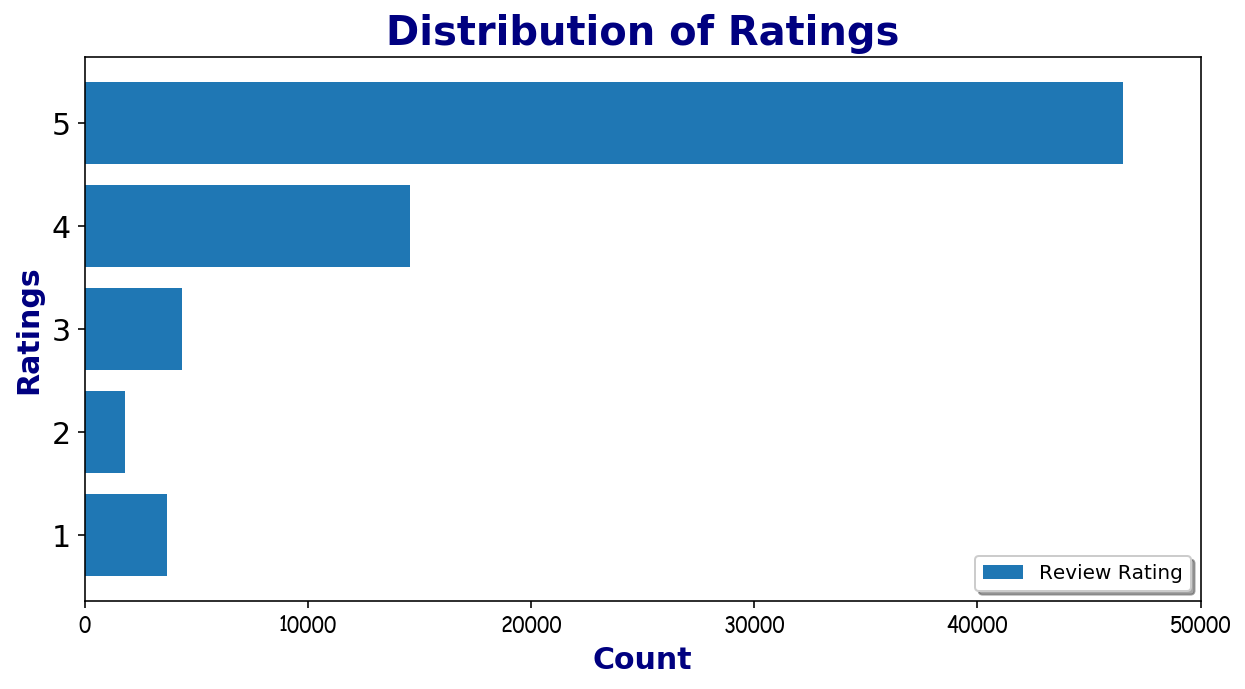

In [7]:
plt.figure(figsize = [10,5])

x = list(df['reviews.rating'].value_counts().index)
y = list(df['reviews.rating'].value_counts() )
plt.barh(x, y)
ticks_x = np.linspace(0, 50000, 6)
plt.xticks(ticks_x, fontsize = 10, family = 'fantasy', color = 'black')
plt.yticks(size = 15)
plt.title('Distribution of Ratings', fontsize = 20, weight = 'bold', color = 'navy', loc = 'center')
plt.xlabel('Count', fontsize= 15, weight = 'bold', color ='navy')
plt.ylabel('Ratings', fontsize=15, weight = 'bold', color = 'navy')
plt.legend(['Review Rating'], shadow = True, loc= 4)

In [8]:
from wordcloud import WordCloud, STOPWORDS

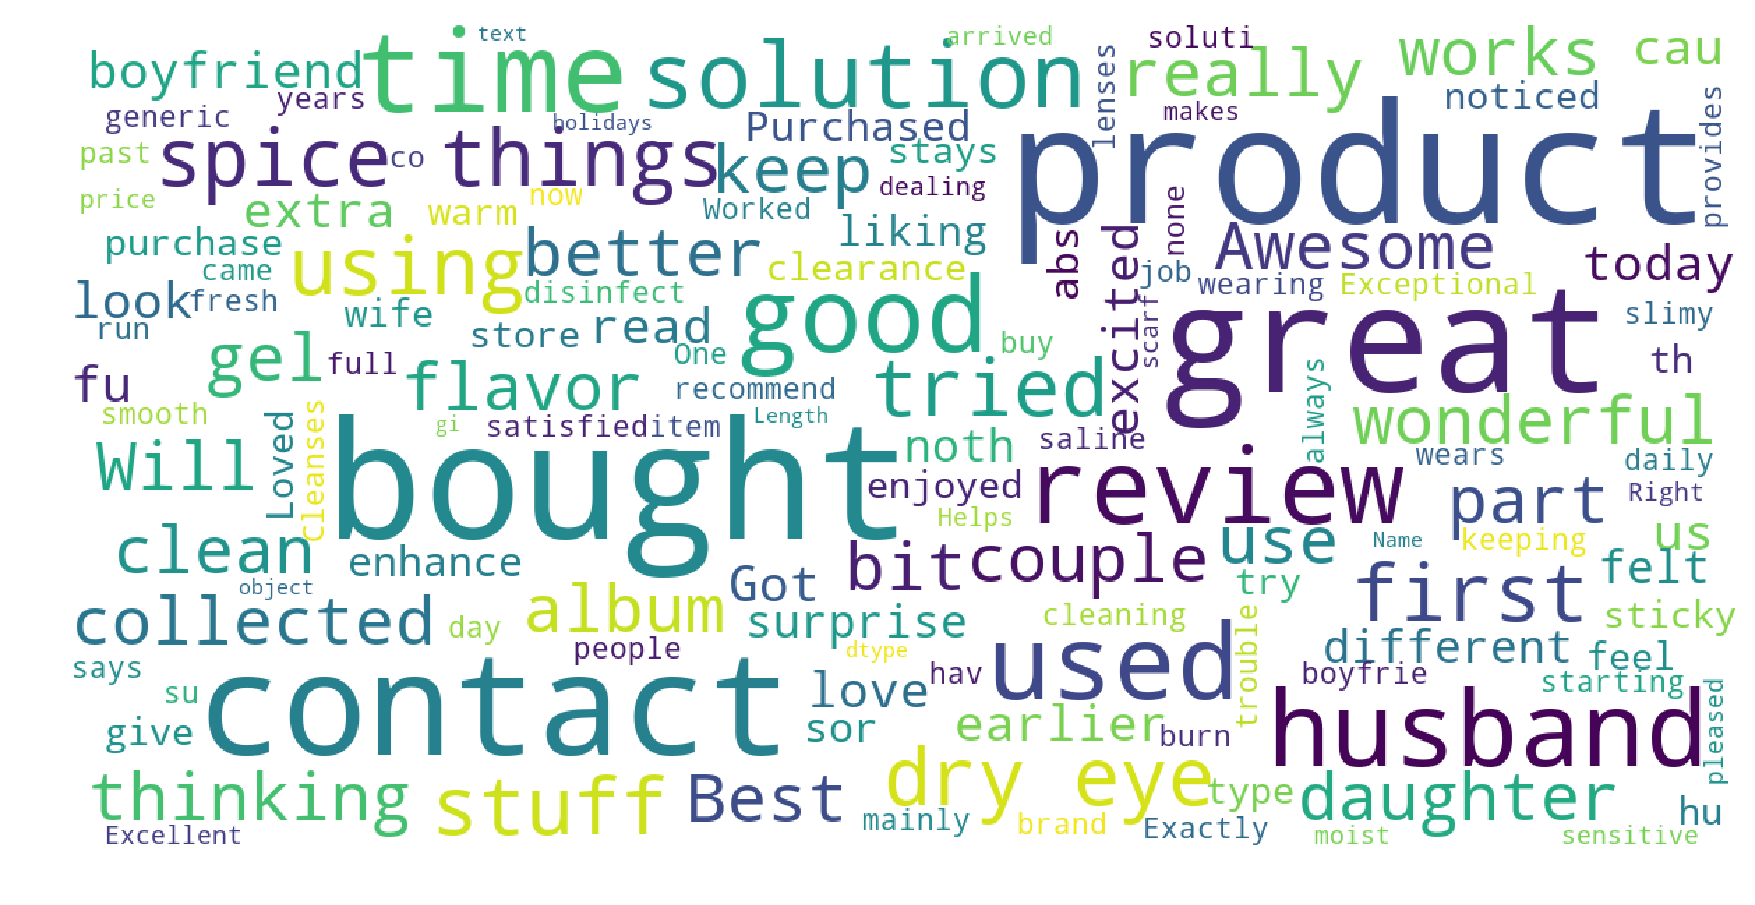

In [9]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title =None):
    wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 300, max_font_size = 40, scale = 3, random_state = 1).generate(str(data))
    
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews.text'])

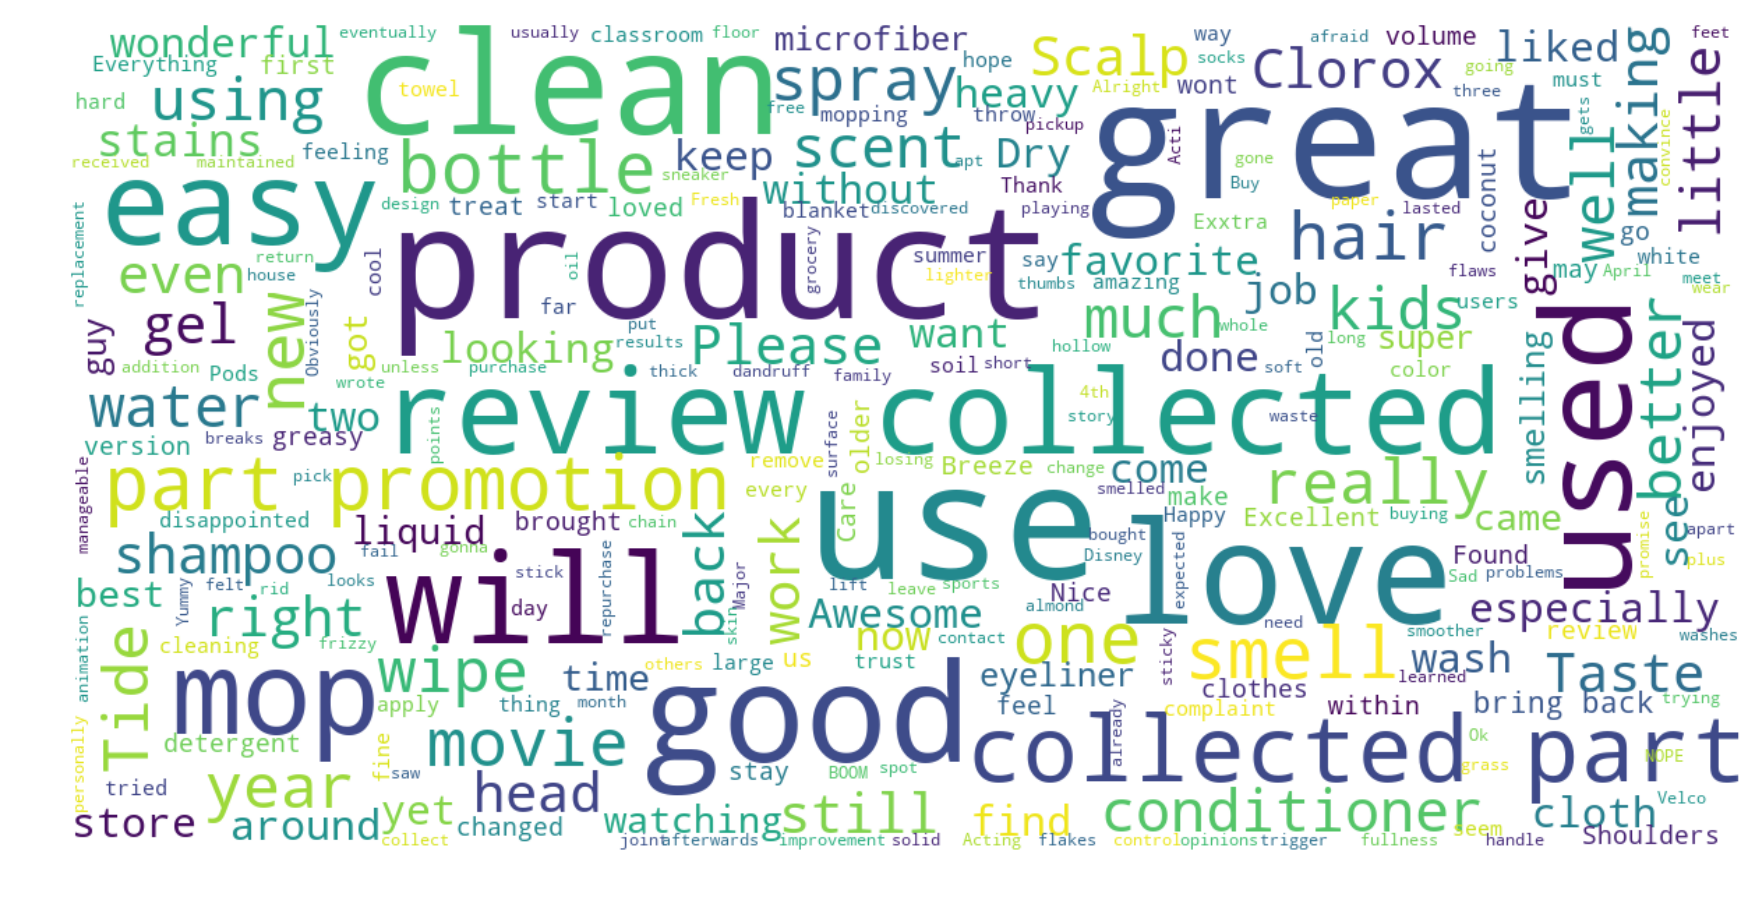

In [10]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['reviews.text'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

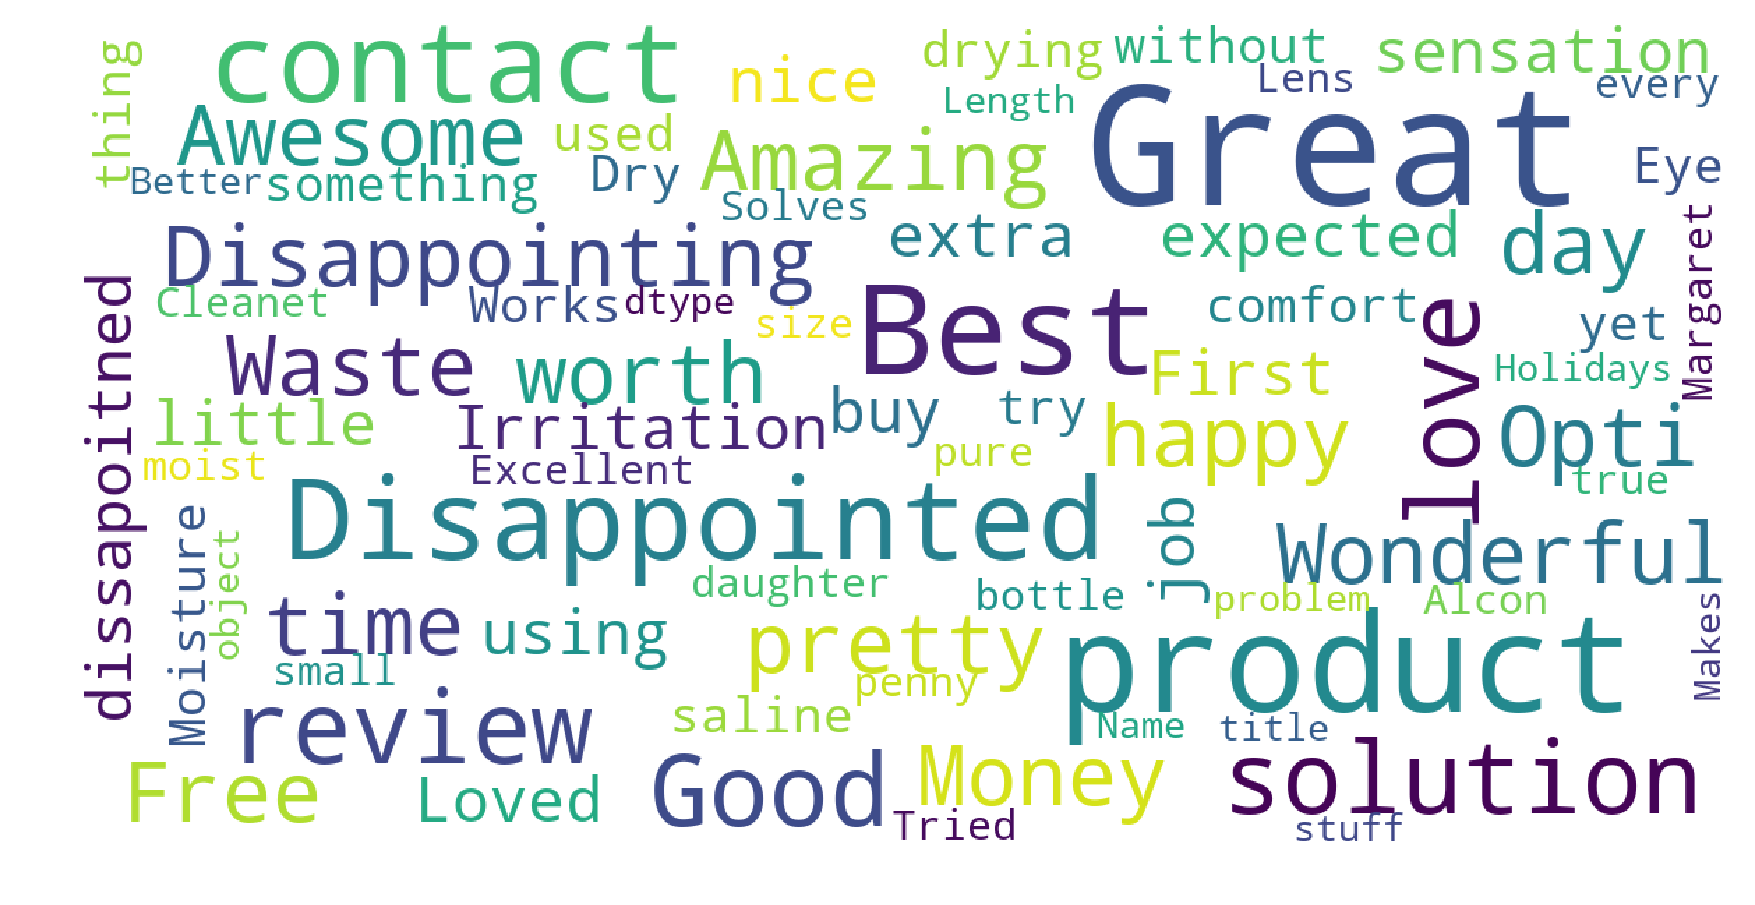

In [11]:
show_wordcloud(df['reviews.title'])


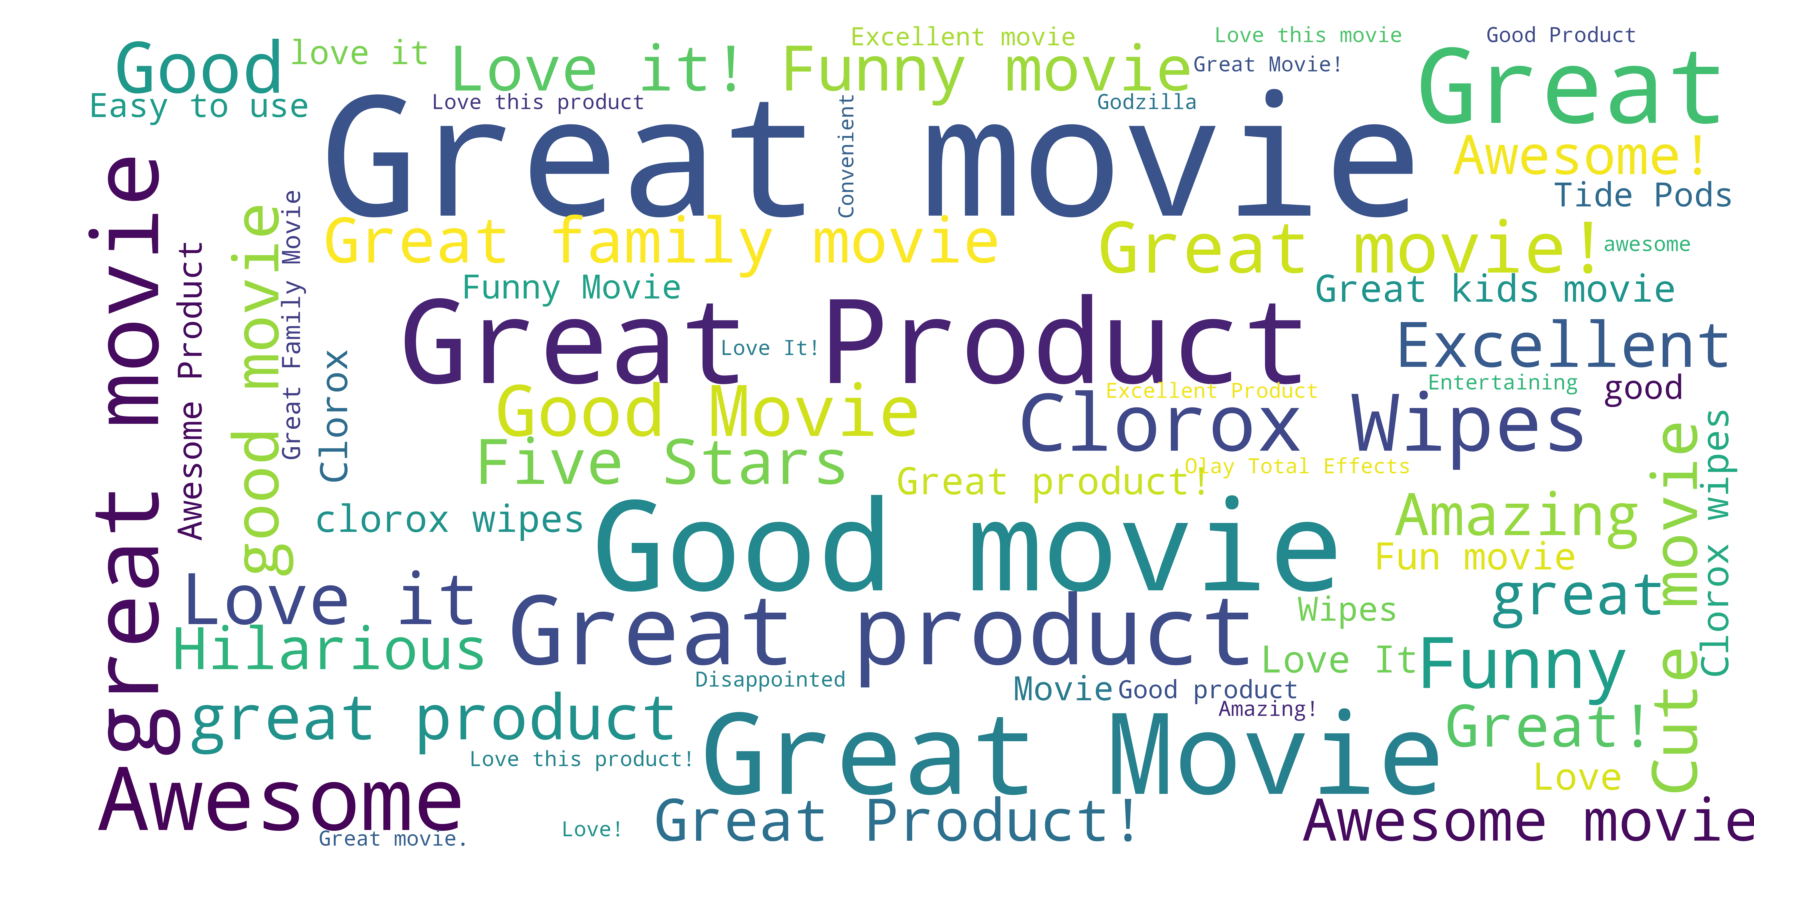

In [12]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['reviews.title'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

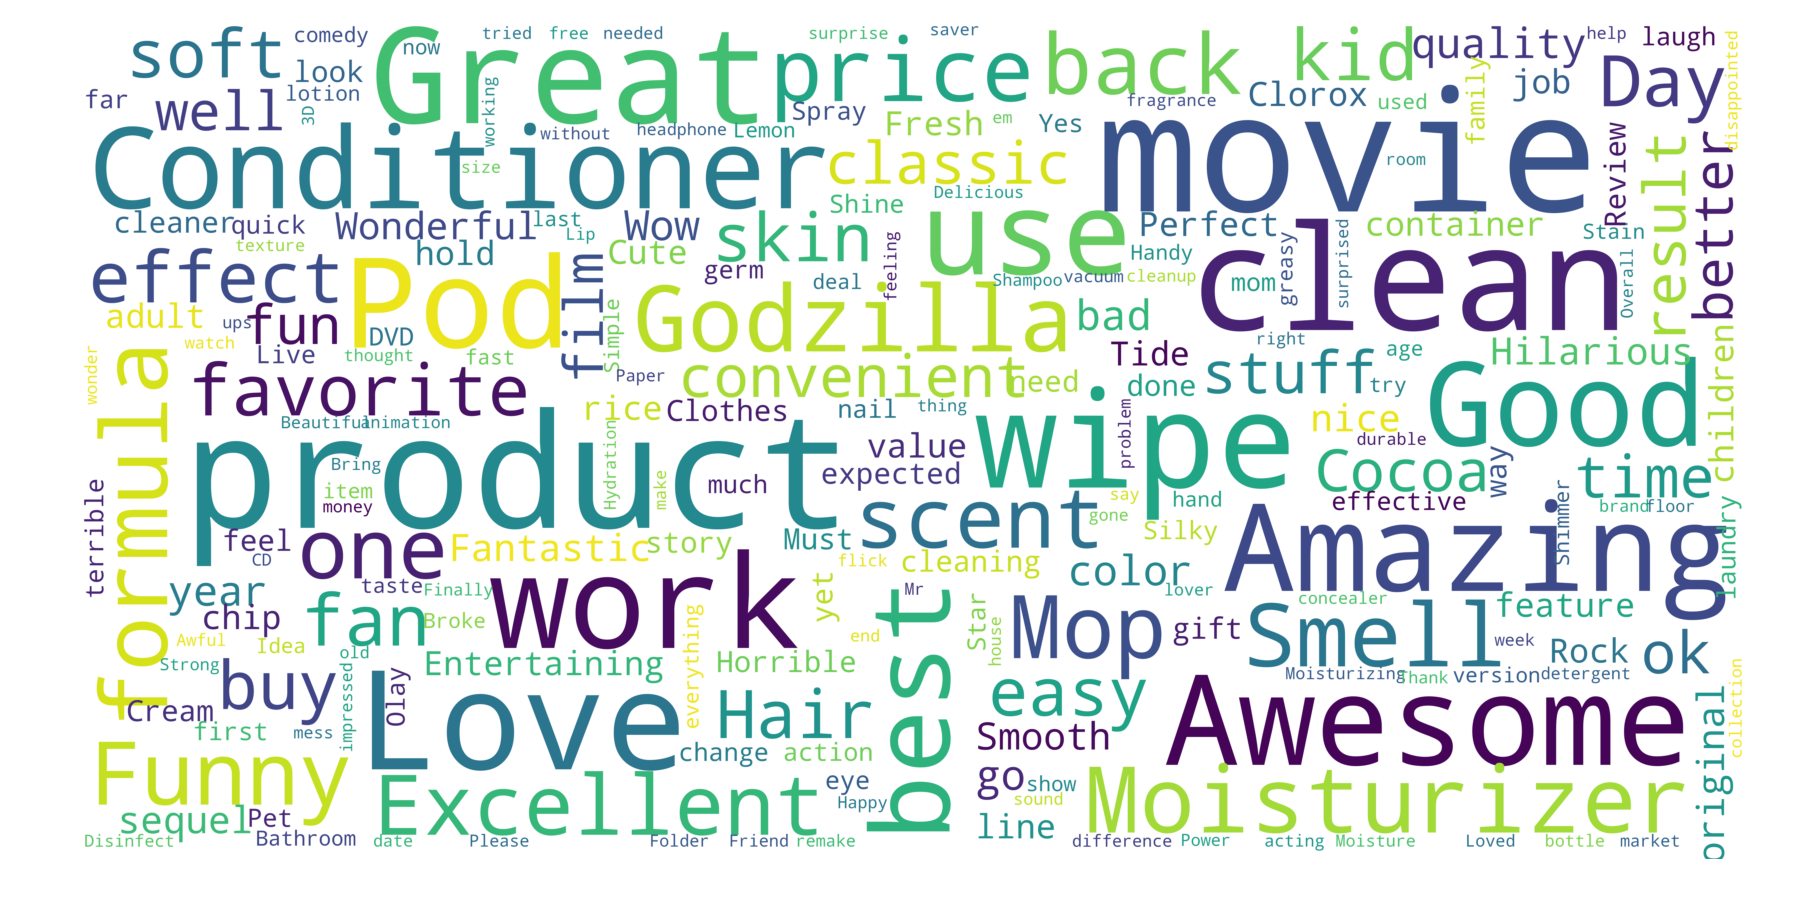

In [13]:
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()
wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30, random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
len(big_list)

232473

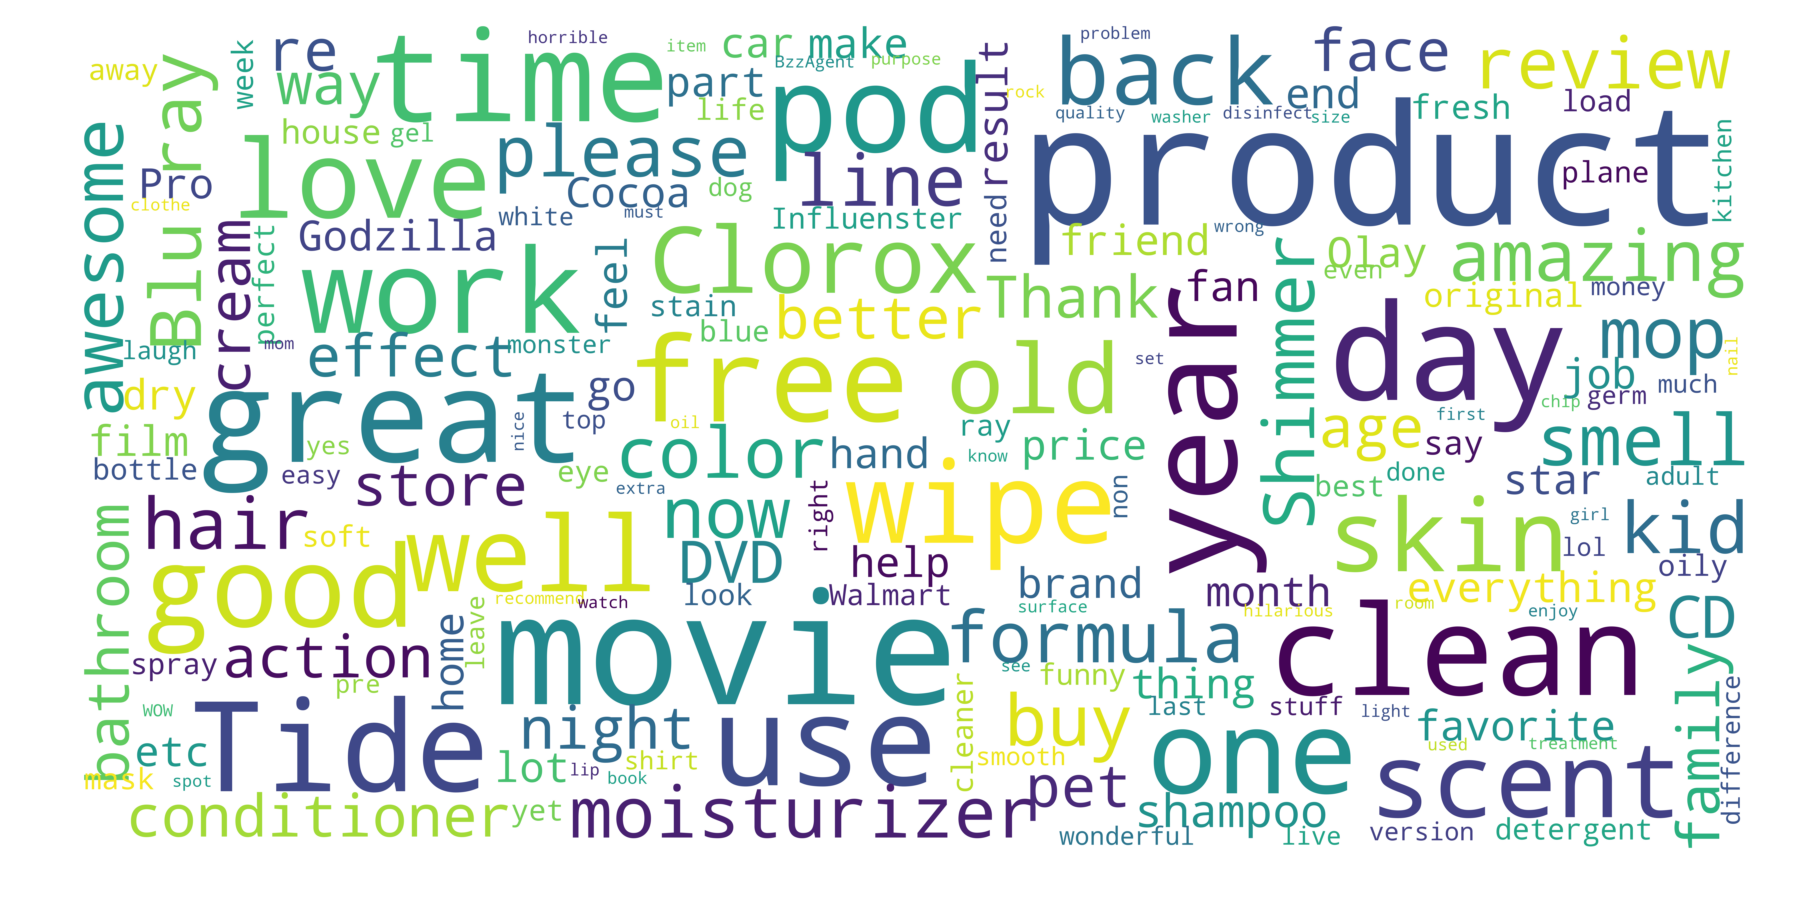

In [15]:
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
len(big_list)   # reviews.text

2801005

In [17]:
df['categories'].value_counts()

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8606
Featured Brands,Character Shop,The Secret Life Of Pets,Movies, Music & Books,Movies,Kids' & Family,Movies & TV,4K Ultra HD Movies,Movies & Music,Movies & TV Shows,Blu-ray                                                                                                                                                                                                                                                                                                              5510
Movies, Music & Books,Movies,Action & Adventur

In [18]:
df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                               8606
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                                                    5510
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                                                3609
Tide Original Liquid Laundry Detergent - 100 Oz                                                         3498
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                         3330
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz                                          2766
The Jungle Book (blu-Ray/dvd + Digital)                                                                 2489
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                          2288
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer                                           2286
Clorox Disinfecting

In [19]:
df['reviews.didPurchase'].fillna('Null',inplace = True)

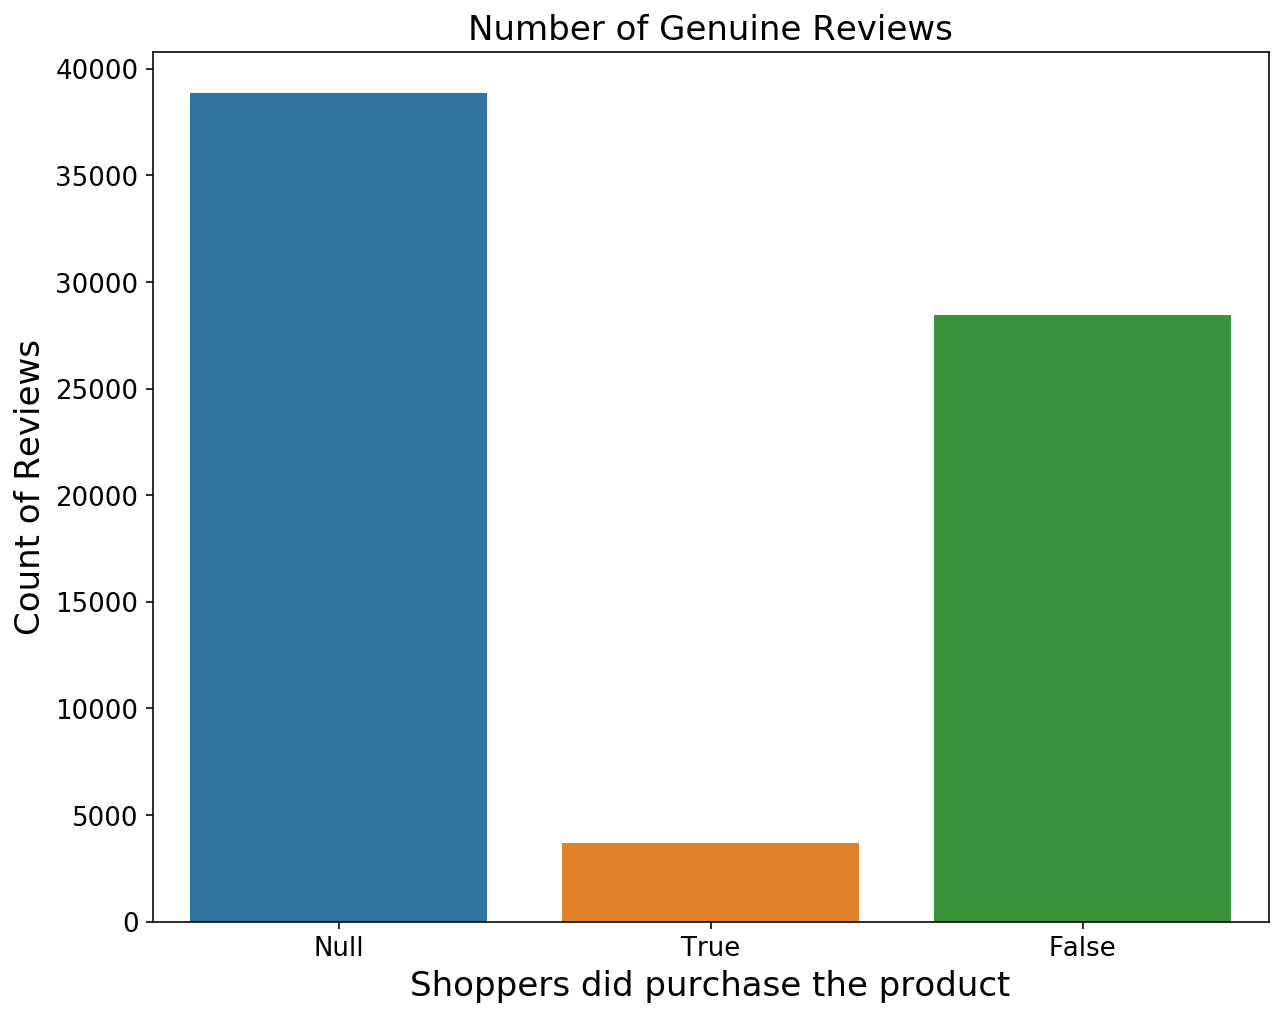

In [20]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews.didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

In [21]:
df['reviews.didPurchase'].value_counts()

Null     38852
False    28474
True      3682
Name: reviews.didPurchase, dtype: int64

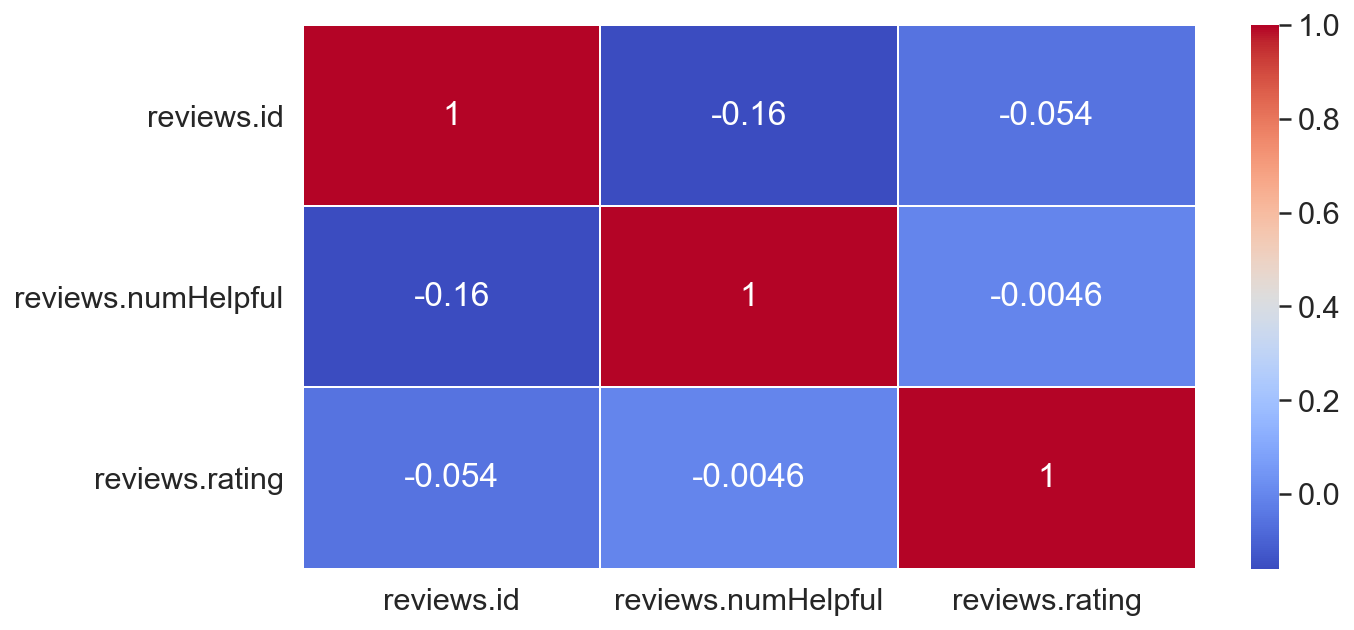

In [22]:
sns.set(font_scale = 1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, linewidth =.5)

In [23]:
df1 = df[df['reviews.didPurchase']==True]
df1['name'].value_counts()

The Foodsaver174 10 Cup Fresh Container - Fac10-000                               477
Pantene Airspray Hairspray - 7 Oz                                                 443
Hormel Chili, No Beans                                                             91
Coty Airspun Face Powder, Translucent Extra Coverage                               88
Just For Men Brush-In Color Gel For Mustache & Beard, Dark Brown M-45              80
Chester's Cheese Flavored Puffcorn Snacks                                          79
Just For Men Shampoo In Hair Color, Light-Medium Brown 30                          73
Oralbalance Mouth Moisturizing Gel                                                 63
Tostitos Bite Size Tortilla Chips                                                  60
Cinnamon Toast Crunch                                                              59
Lysol Concentrate Deodorizing Cleaner, Original Scent                              56
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks    

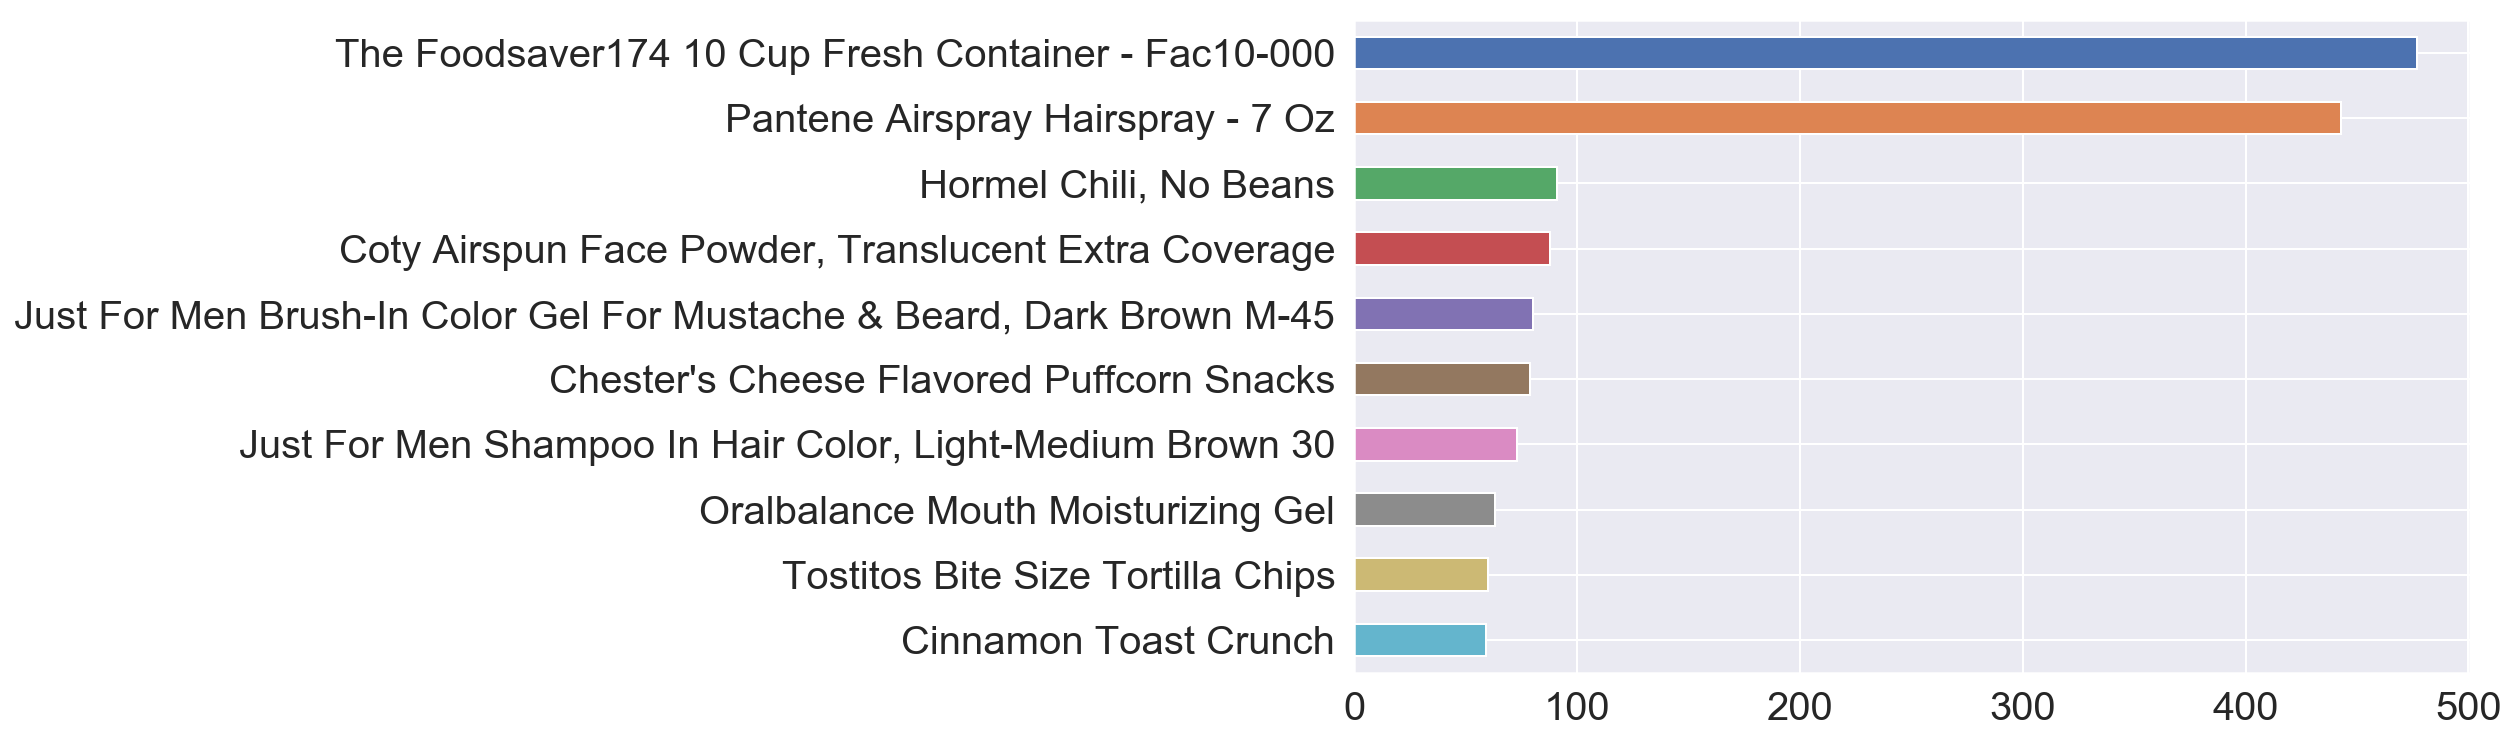

In [24]:
df1['name'].value_counts()[0:10].plot('barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [25]:
df1 = df1[df1['name'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']
df1 = df1[df1['reviews.rating']==5]
# keep relevant columns only
df1 = df1[[ 'reviews.rating', 'reviews.text']]
df1

reviews.rating                                       reviews.text
46943               5  I love the fact you can see what is inside, ea...
46944               5  I have used my foodsaver container over and ov...
46945               5  I bought this set as well as the 10 cup contai...
46946               5  I have had a chance to use these for a while. ...
46947               5  My veggie's stayed good for two weeks! Overall...
46948               5  Keeps food fresh. Stack nice for storage. I li...
46949               5  Bought it for my home made ice cream. Sense my...
46950               5  So glad that I bought them. Money well spent. ...
46951               5  Wow, I had strawberries stay fresh for over 12...
46952               5  Superb way to keep berries and other fruit fre...
46953               5  Well made container. Holds the vacuum well and...
46954               5  I have purchased two sets over the past year. ...
46955               5  I am so happy that I bought this product. Grea...
46956               5  i like and they work! yaaaay! no more wasted f...
46958               5  My vegetables lasted three times longer when I...
46959               5  These are fabulous! I kept salad in the larges...
46960               5  Have been wishing for larger containers and am...
46962               5  These are so easy to use and are good quality....
46963               5  This container surpassed all my expectations. ...
46964               5  I am very pleased with my purchase. Two words ...
46965               5  Bought a set to try out the features. Over pro...
46966               5  I am very happy with new style container. Much...
46967               5  Thought they would keep produce for a week, bu...
46968               5  Head of lettuce...three weeks still good. Cher...
46969               5  I bought this a couple of months ago or so, an...
46970               5  I absolutely love the FoodSaver Fresh containe...
46971               5  like these the best they really help preserve ...
46972               5  I've used these to store cookies and a week la...
46974               5  Bought this set hoping to keep my greens and s...
46975               5  I really like the new fresh saver containers. ...
...               ...                                                ...
47310               5  I USE THESE ALL THE TIME!!!! LOVE THEM!!!!! TH...
47311               5  What a great idea for FoodSaver. I love that t...
47313               5  I bought 2 of these sets, because I knew I was...
47314               5  I have replaced all plastic and glass containe...
47317               5  We went ahead and purchased some of these and ...
47319               5  Have 4 of these sets and more of the rectangul...
47322               5  already saving me money and the food we eat ta...
47323               5  these containers keep my fruits and vegetables...
47324               5  The long container is great to save cut up let...
47325               5  there great have used them now a few times wil...
47326               5  I am very pleased with all of the New FoodSave...
47327               5  I bought this about 4 weeks ago. I have found ...
47328               5  I bought one for myself and loved it so much t...
47329               5  I bought this product about a month ago and it...
47330               5  My husband absolutely loves these containers, ...
47331               5  Best vacuum sealing product I've ever bought. ...
47332               5  Have been using this container to keep my left...
47333               5  FoodSavers as usual---its just perfect. No mor...
47334               5  I just told my brother about this product. He ...
47335               5  I bought the set after purchasing a few single...
47336               5  I'm so thrilled with these containers that I n...
47337               5  Like this FoodSaver Fresh Container in the 3-c...
47338               5  I have replaced all plastic and glass cont

In [31]:
df1.to_csv('Foodsaver_5.csv', index = False)

In [32]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer



In [33]:
all_text = df['reviews.text']
y = df['reviews.rating']

In [34]:
word_vectorizer = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'word', token_pattern = r'\w{1,}',
                                 stop_words = 'english', ngram_range = (1,3) )

word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [35]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [36]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (49705, 1346053)
y_train (49705,)
X_test (21303, 1346053)
y_test (21303,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
classifier = RandomForestClassifier(n_estimators = 100, max_depth = None, random_state = seed, n_jobs = -1)
classifier.fit(X_train, y_train)
preds1= classifier.predict(X_test)
time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
print(accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

In [ ]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=-1)
xgb.fit(X_train,y_train)
preds2=xgb.predict(X_test)
time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
# manual method to check accuracy, see first 100 predictions, around 70% correct prediction
for i in range(100):
    if preds2[i] == np.array(y_test)[i]:
        print('1', end=', ')   # correct prediction
    else:
        print('0', end=', ')   # wrong prediction

In [ ]:
preds2[0:100: 5]

In [ ]:
np.array(y_test)[0:100: 5]

In [ ]:

correct = 0
wrong = 0
for i in range(21303):
    if preds2[i] == np.array(y_test)[i]:
        correct += 1
    else:
        wrong += 1
print(correct+wrong)
print(correct/21303)



In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [39]:
time1 = time.time()

logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 98.96 seconds


In [40]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.7328075857860396
              precision    recall  f1-score   support

           1       0.65      0.75      0.70       973
           2       0.08      0.75      0.14        56
           3       0.18      0.54      0.27       445
           4       0.26      0.51      0.34      2209
           5       0.96      0.76      0.85     17620

    accuracy                           0.73     21303
   macro avg       0.43      0.66      0.46     21303
weighted avg       0.86      0.73      0.78     21303

[[  734   127    59    30    23]
 [    8    42     4     1     1]
 [   32    62   241    85    25]
 [   46   109   458  1124   472]
 [  312   210   551  3077 13470]]


In [41]:
df['sentiment'] = df['reviews.rating']<4


In [42]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['sentiment'],test_size = 0.2)

In [43]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [44]:
MAX_NB_WORDS = 20000

texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level = False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 26118 unique tokens.


In [45]:
MAX_SEQUENCE_LENGTH = 200

x_train = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen = MAX_SEQUENCE_LENGTH)
print(x_train.shape)
rint(x_test.shape)

(56806, 200)


array([14202.,   200.])

In [46]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2,input_shape = (1,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

model.fit(x_train, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, test_y))